# Lab 3: Analyzing Data

In [4]:
import numpy as np
import ugradio
%matplotlib notebook
import matplotlib.pyplot as plt
import glob
import astropy
from itertools import chain

In [ ]:
def PS(x, divisor):
    """Takes in a complex array and outputs a plot of frequency versus power spectrum."""

    voltage = np.fft.fft(x)
    power = np.abs(voltage)**2
    freq = np.fft.fftfreq(len(x), 1/62.5)
    plt.plot(freq, power)
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Power [volt-second^2]")
    plt.show()

## The Sun

In [25]:
sun = np.load('sun_mar14.npz')
sun_times = sun['unitimes']
sun_volts = sun['volts']

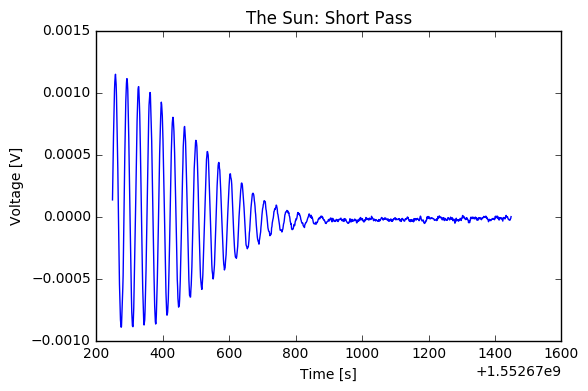

In [20]:
plt.plot(sun_times, sun_volts, '-')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('The Sun: Short Pass')
plt.show()

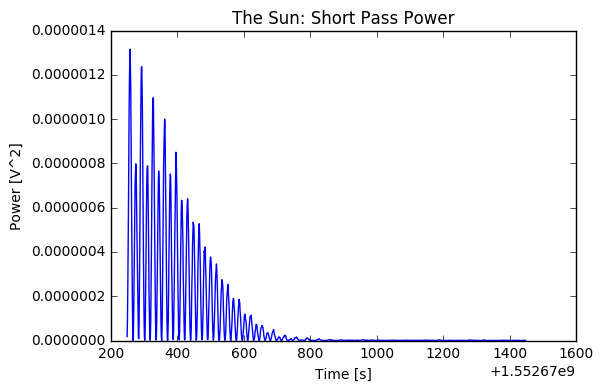

In [21]:
plt.plot(sun_times, sun_volts**2, '-')
plt.xlabel('Time [s]')
plt.ylabel('Power [V^2]')
plt.title('The Sun: Short Pass Power')
plt.show()

In [22]:
sun2 = np.load('sun_mar19.npz')
sun2_times = sun2['unitimes']
sun2_volts = sun2['volts']

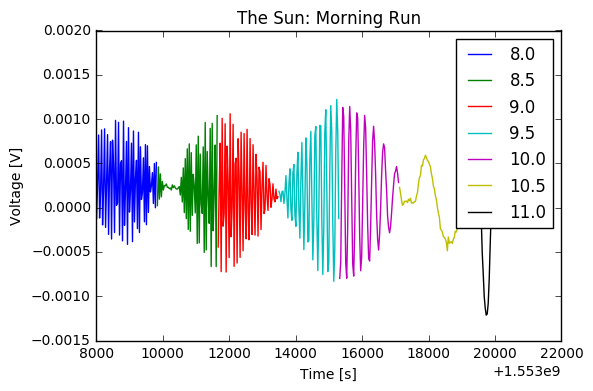

In [33]:
for i in range(len(sun2_times)):
    plt.plot(sun2_times[i], sun2_volts[i], label=i*0.5+8)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.title('The Sun: Morning Run')
    
plt.legend()
plt.show()    

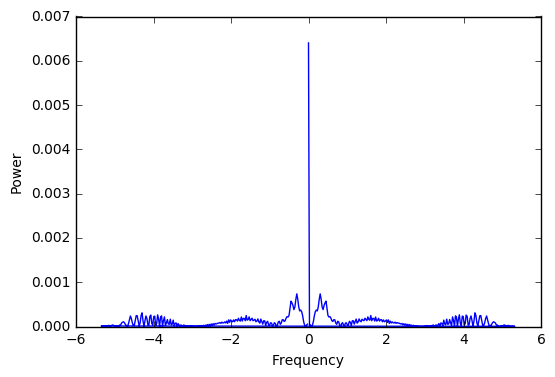

In [37]:
sun2_flat = list(chain.from_iterable(sun2_volts))

voltage = np.fft.fft(sun2_flat)
power = np.abs(voltage)**2
freq = np.fft.fftfreq(len(sun2_flat), 1/10.7)
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()

## The Moon

In [11]:
moon = np.load('moon_mar17.npz')
moon_times = moon['unitimes']
moon_volts = moon['volts']

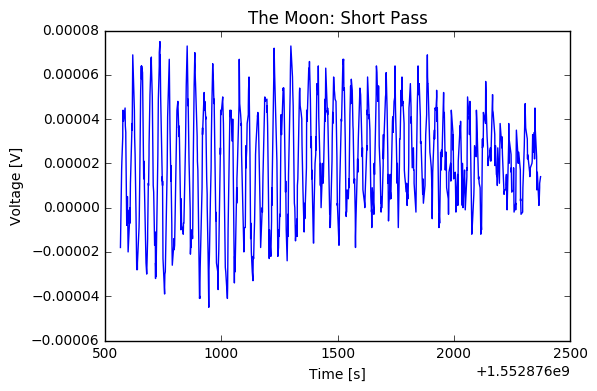

In [12]:
plt.plot(moon_times[0], moon_volts[0])
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('The Moon: Short Pass')
plt.show()

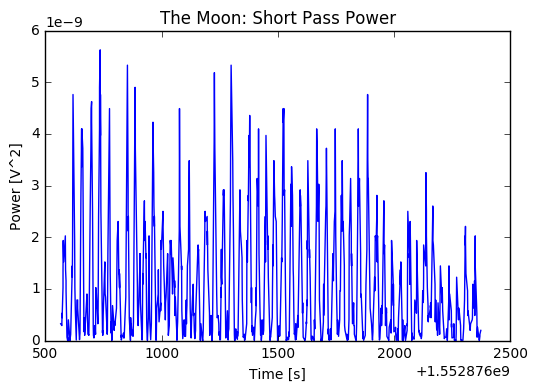

In [14]:
plt.plot(moon['unitimes'][0], moon['volts'][0]**2, '-')
plt.xlabel('Time [s]')
plt.ylabel('Power [V^2]')
plt.title('The Moon: Short Pass Power')
plt.show()

In [6]:
moon2 = np.load('moon_mar18.npz')
moon2_times = moon2['unitimes']
moon2_volts = moon2['volts']

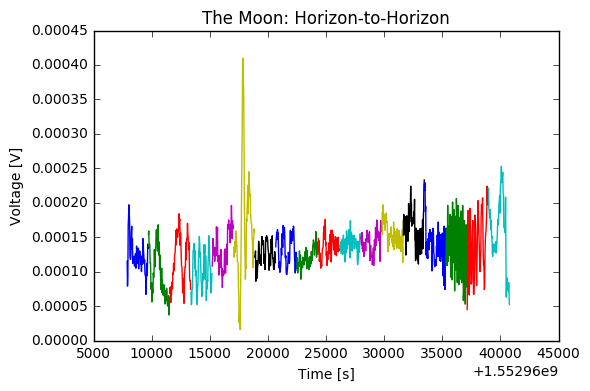

In [26]:
for i in range(len(moon2_times)):
    plt.plot(moon2_times[i], moon2_volts[i])
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.title('The Moon: Horizon-to-Horizon')
    
plt.show()    

<IPython.core.display.Javascript object>


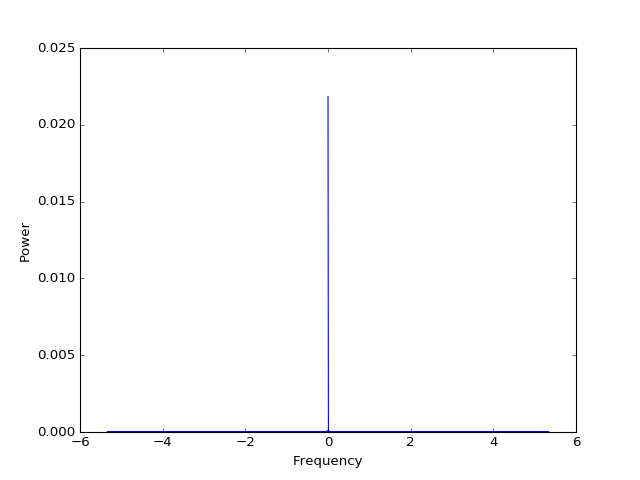

In [43]:
moon2_flat = list(chain.from_iterable(moon2_volts))

voltage = np.fft.fft(moon2_flat)
power = np.abs(voltage)**2
freq = np.fft.fftfreq(len(moon2_flat), 1/10.7)
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()

## Cygnus

In [40]:
cygnus = np.load('cygnus_mar17.npz')
cygnus_times = cygnus['unitimes']
cygnus_volts = cygnus['volts']

<IPython.core.display.Javascript object>


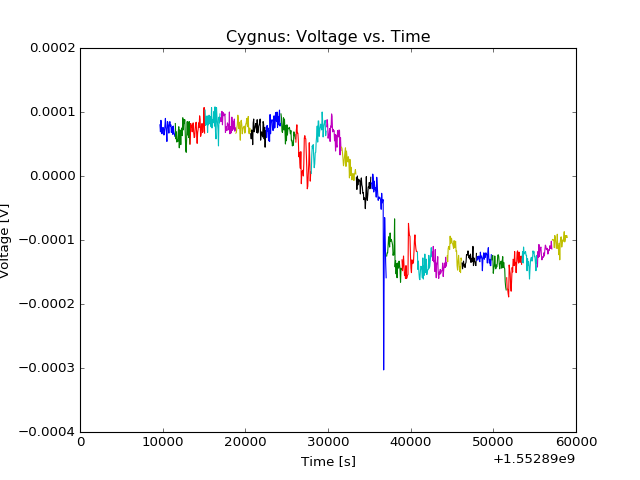

In [48]:
for i in range(len(cygnus_times)):
    plt.plot(cygnus_times[i], cygnus_volts[i], '-', label=i*0.5+2)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.title('Cygnus: Voltage vs. Time')
    
plt.show()    

<IPython.core.display.Javascript object>


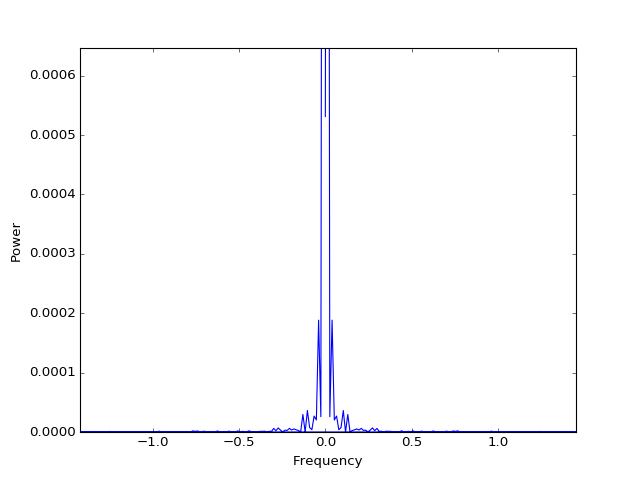

In [45]:
cygnus_flat = list(chain.from_iterable(cygnus_volts))

voltage = np.fft.fft(cygnus_flat)
power = np.abs(voltage)**2
freq = np.fft.fftfreq(len(cygnus_flat), 1/10.7)
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()

## Local Fringe Frequency

In [8]:
def lff_sun(jd, b_x, b_y):
    c = 299792458  # speed of light in meters/second
    f = 10.7e9     # sampling frequency of detectors in Hz
    wl = c/f*100   # wavelength in centimeters
    L = 37.8732    # terrestial latitude
    
    ra, dec = np.deg2rad(ugradio.coord.sunpos(jd))
    lst = ugradio.timing.lst(jd)
    ha = ra - lst  # hour angle in radians
    
    lff = ((b_x/wl)*np.cos(dec))*np.cos(ha) - ((b_y/wl)*np.sin(L)*np.cos(dec))*np.sin(ha)
    return lff

In [9]:
def lff_moon(jd, b_x, b_y):
    c = 299792458  # speed of light in meters/second
    f = 10.7e9     # sampling frequency of detectors in Hz
    wl = c/f*100   # wavelength in centimeters
    L = 37.8732    # terrestial latitude
    
    ra, dec = np.deg2rad(ugradio.coord.moonpos(jd))
    lst = ugradio.timing.lst(jd)
    ha = ra - lst  # hour angle in radians
    
    lff = ((b_x/wl)*np.cos(dec))*np.cos(ha) - ((b_y/wl)*np.sin(L)*np.cos(dec))*np.sin(ha)
    return lff

In [10]:
def lff_cyg(jd, b_x, b_y):
    c = 299792458  # speed of light in meters/second
    f = 10.7e9     # sampling frequency of detectors in Hz
    wl = c/f*100   # wavelength in centimeters
    L = 37.8732    # terrestial latitude
    
    ra, dec = np.deg2rad(299.86815417, 40.73391667)
    lst = ugradio.timing.lst(jd)
    ha = ra - lst  # hour angle in radians
    
    lff = ((b_x/wl)*np.cos(dec))*np.cos(ha) - ((b_y/wl)*np.sin(L)*np.cos(dec))*np.sin(ha)
    return lff

In [11]:
b_x = 1500 # east-west baseline in centimeters (~50 ft)

Q_ew = (b_x/wl)*np.cos(dec)

Q_ns = (b_y/wl)*np.sin(L)*np.cos(dec)

## Fringe Amplitude for a Point Source

In [ ]:
t_g = ((b_x/c)*np.cos(dec))*np.sin(ha) - ((b_y/c)*np.sin(L)*np.cos(dec))*np.cos(ha)
t_c = 

In [69]:
A = np.cos(2*np.pi*nu*t_c)
B = np.sin(2*np.pi*nu*t_c)
F = A*np.cos(2*np.pi*nu*t_g) - B*np.sin(2*np.pi*nu*t_g)

NameError: name 'nu' is not defined